# TITANIC KAGGLE CHALLENGE

Proyek machine learning ini merupakan sebuah masalah yang masuk dalam kompetisi yang diadakan di kaggle.com.
Dalam proyek ini, akan digunakan tools dan dasar-dasar machine learning dan visualisasi data.
Data yang digunakan diambil dari kaggle, dan berisi beberapa kolom:
Survival, pclass, Name, Sex, Age, Age, SibSP, Parch, Ticket, Fare, Cabin, Embarked

In [357]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Convert Data
Beberapa data di dataset berbentuk string, diantaranya kolom 'Sex' dan 'Embarked'. Untuk menggunakan DecisionTreeClassifier, kedua data tersebut akan diubah menjadi bilangan.

In [358]:
all_data_raw = pd.read_csv('train.csv')
all_data_raw['Sex'] = all_data_raw['Sex'].apply({'male':1, 'female':0}.get)
all_data_raw['Embarked'] = all_data_raw['Embarked'].apply({'S':1, 'C':2, 'Q':3}.get)
use_data = all_data_raw[['Sex', 'Survived', 'Pclass','Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

### Cleaning Data
Berdasarkan inspeksi, ada beberapa data yang memiliki nilai N/A (kosong). Data-data tersebut akan didrop sehingga tidak mengganggu proses modelling.

In [359]:
data_clean = use_data.dropna(axis='rows') #Buang data dengan nilai tidak lengkap

### Visualisasi Data
Berikut merupakan sedikit visualisasi data perbandingan dari survival rate berdasarkan gender.

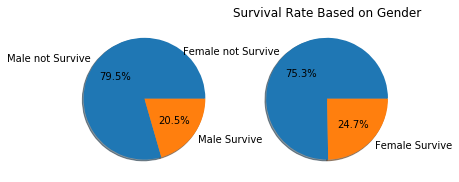

In [360]:
m = data_clean['Sex'].isin([1])
f = data_clean['Sex'].isin([0])
m_survive = data_clean[m]['Survived'].value_counts()
f_survive = data_clean[f]['Survived'].value_counts()


label = ['Male not Survive', 'Male Survive']
fig1, (ax1,ax2) = plt.subplots(1,2)
ax1.pie(m_survive , labels=label, shadow = True, autopct='%1.1f%%')


label = ['Female not Survive', 'Female Survive']
ax2.pie(f_survive , labels=label, shadow = True, autopct='%1.1f%%')


plt.title('Survival Rate Based on Gender')
plt.show()

### Train & Test Model

In [361]:
X = data_clean.drop(columns = ['Survived'])
y = data_clean['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

accuracy_score(y_test, pred)

0.8041958041958042

Dari penerapan model DecisionTreeClassifier, dari beberapa kali percobaan, hampir seluruh nilai keakuratan lebih dari 70%.
Pada beberapa percobaan, nilai keakuratan bisa mencapai 80%.
Tentu karna percobaan ini menggunakan model yang paling dasar, hasil masih dapat ditingkatkan dengan penyesuaian parameter atau penggunaan model lain.